# Machine Learning (Mini Project) :- 
## Clustering (Country_Data):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\Country-data.csv")
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [3]:
print('total country = {}'.format(df['country'].nunique()))

total country = 167


In [4]:
df.shape

(167, 10)

In [5]:
df1 = df.copy()

In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['country'],axis=1,inplace=True)

In [9]:
df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

## VIF :

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
vif = pd.DataFrame({'Variables':df.columns})
vif['vif'] = [variance_inflation_factor(df.values,r)
           for r in range(len(df.columns))]
vif

Variables        vif
0  child_mort   8.084814
1     exports  16.084236
2      health  12.421525
3     imports  17.280234
4      income  13.414051
5   inflation   1.985961
6  life_expec  21.916807
7   total_fer  17.673828
8        gdpp  10.298641

## Correlation :

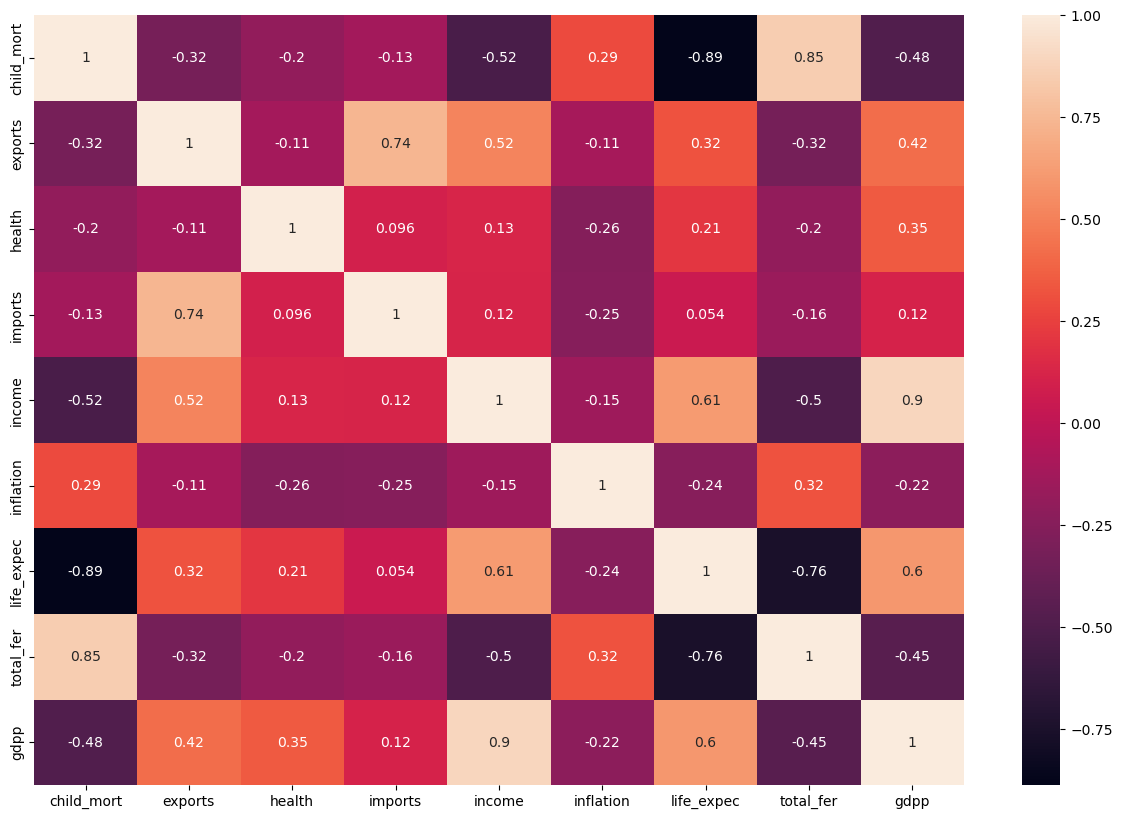

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

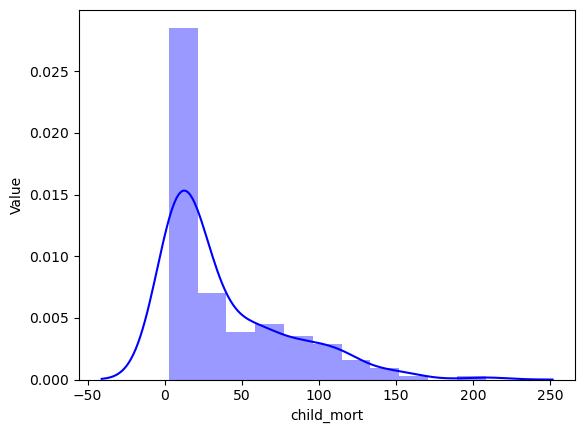

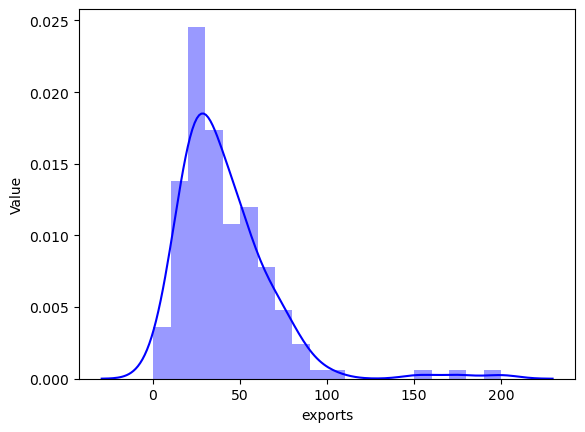

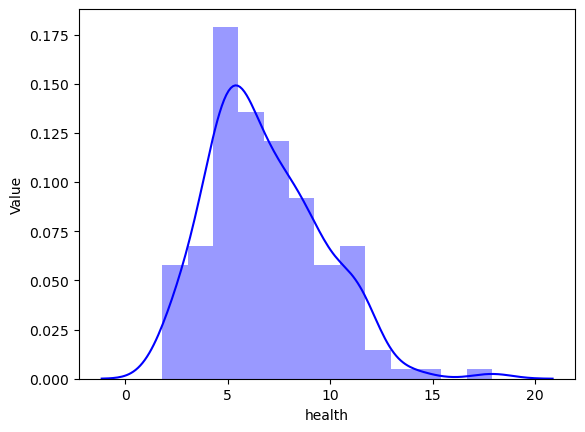

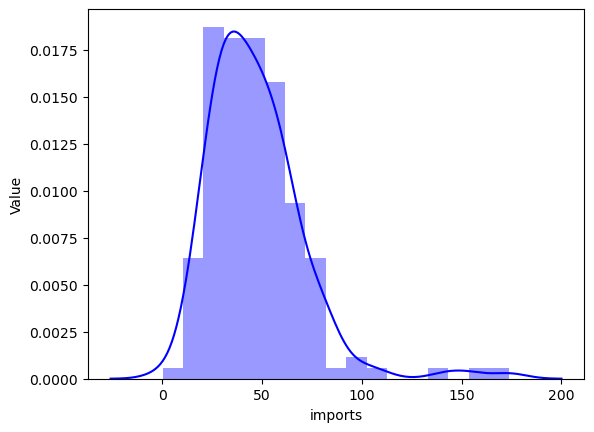

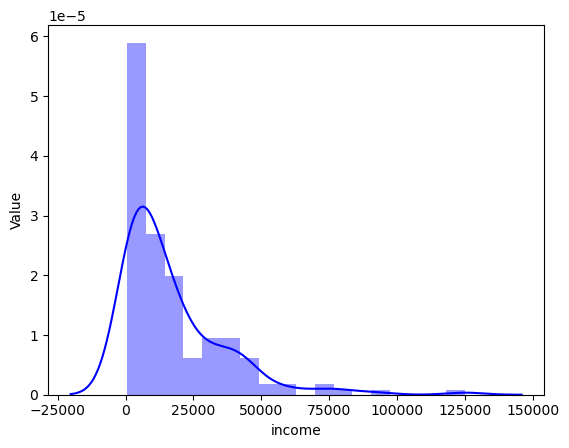

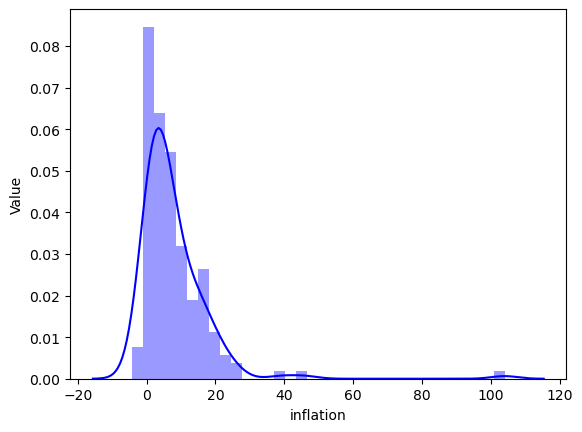

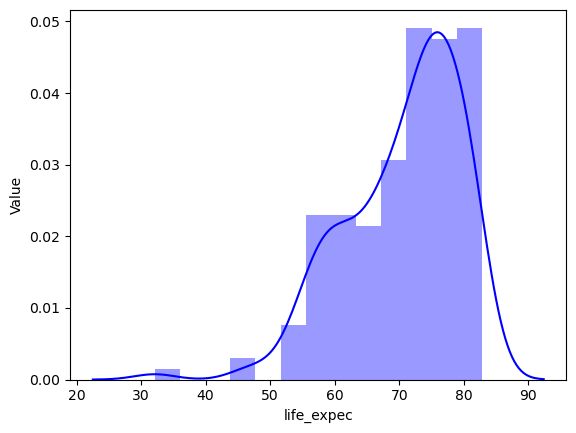

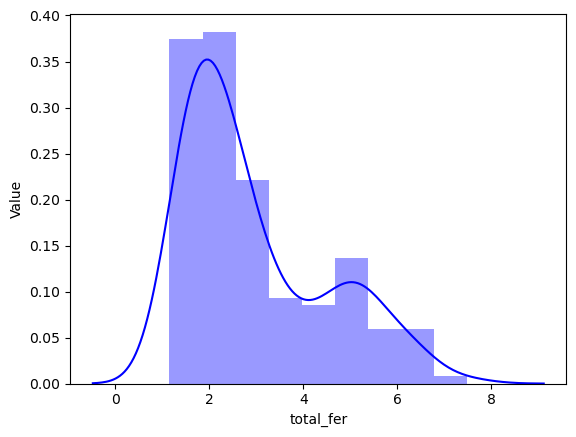

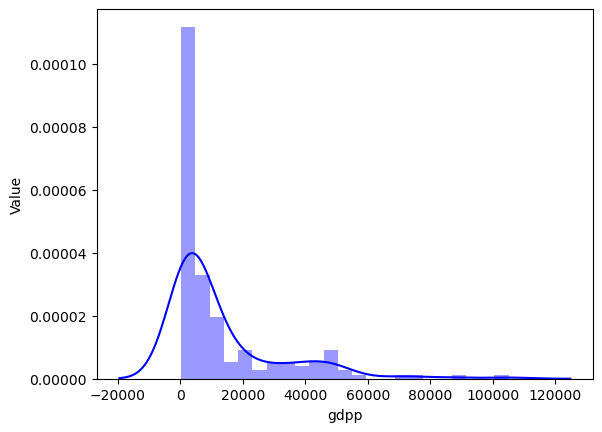

In [13]:
for i in df.columns:
    sns.distplot(df[i],color='blue')
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.show()

<Figure size 3000x2000 with 0 Axes>

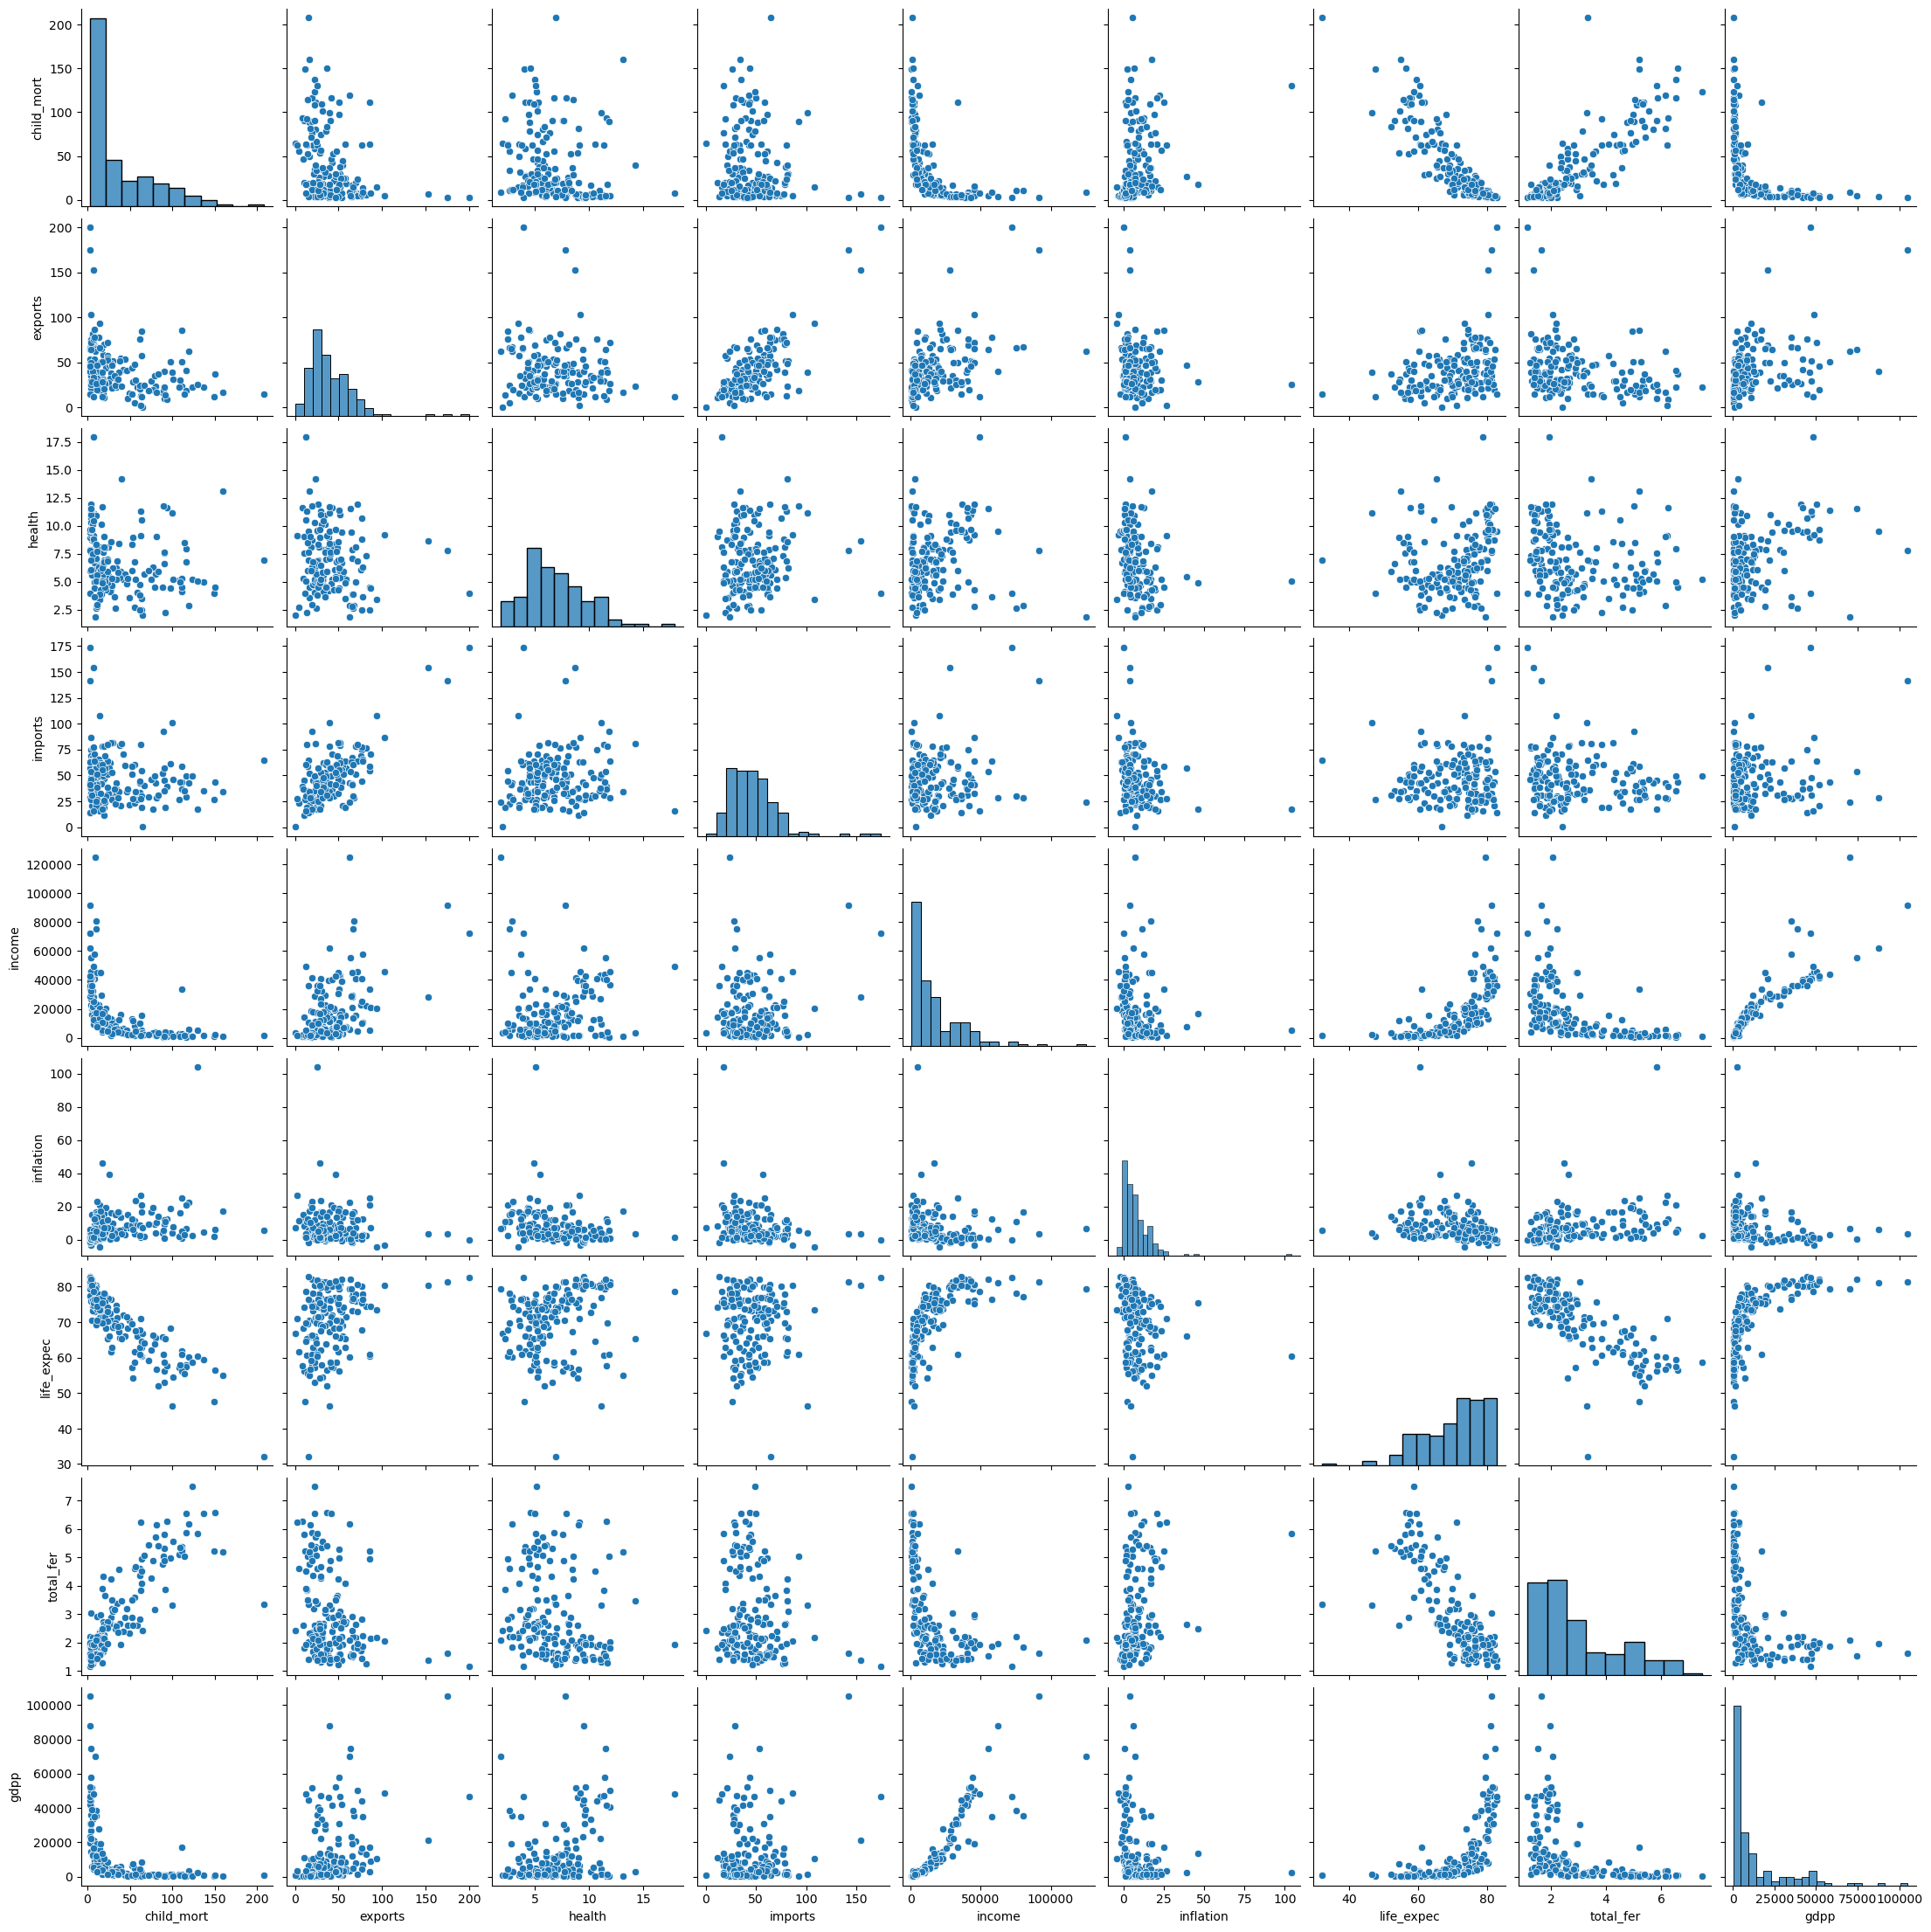

In [14]:
plt.figure(figsize=(30,20))
sns.pairplot(df)
plt.show()

# Detecting Outliers :

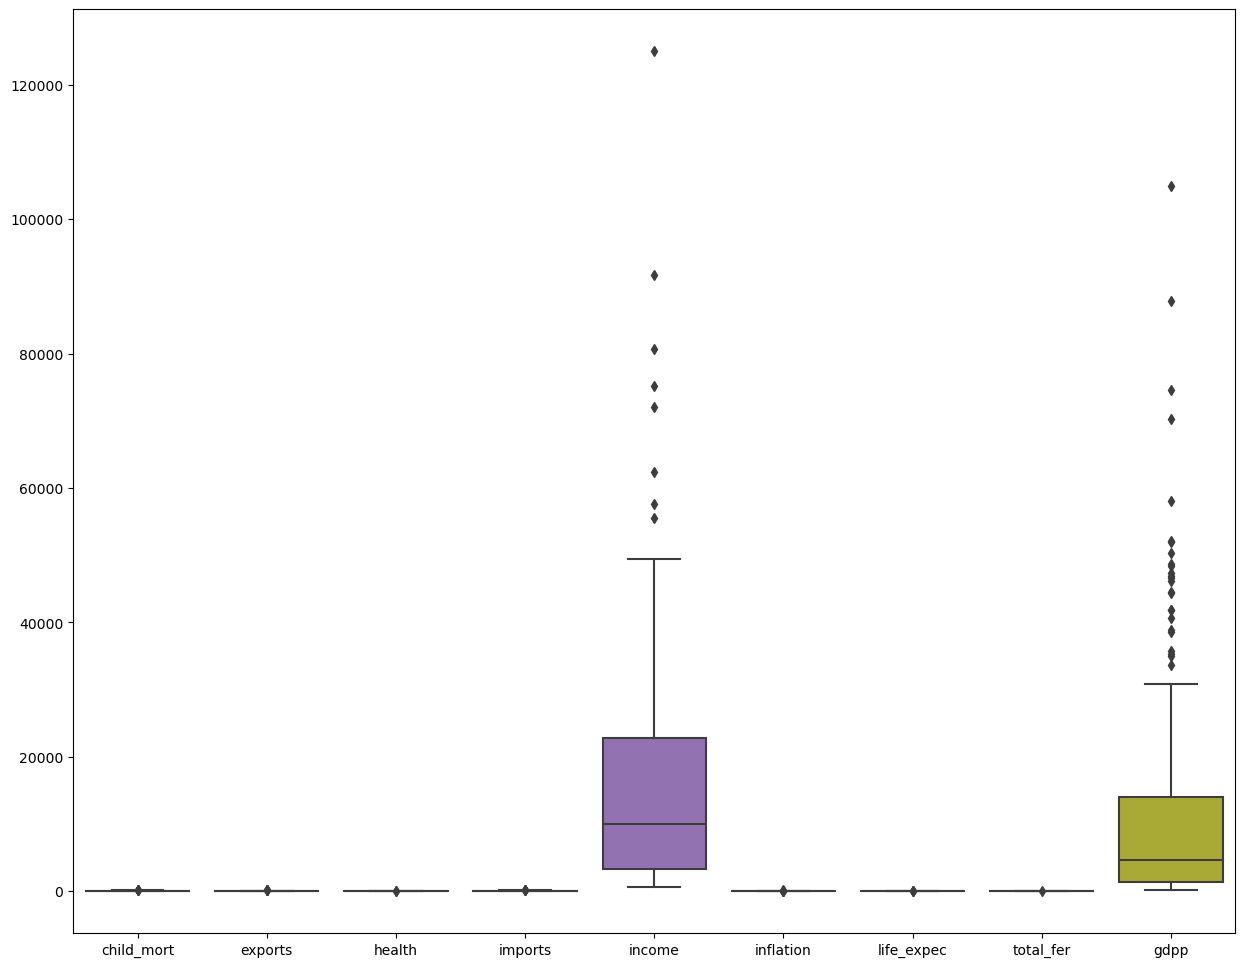

In [15]:
x1 = df1.drop(['country'],axis=1)
plt.figure(figsize=(15,12))
sns.boxplot(data=x1)
plt.show()

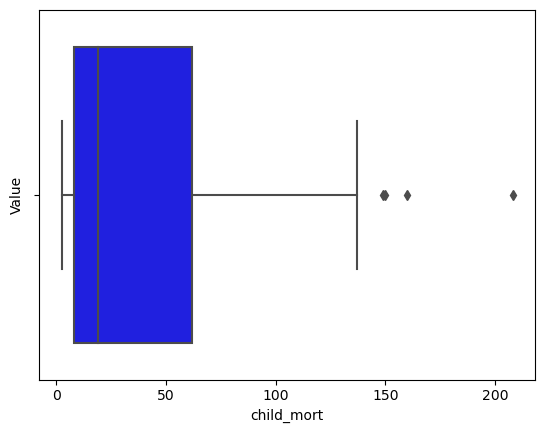

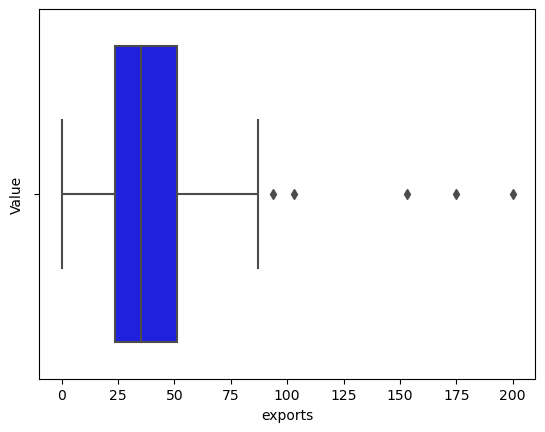

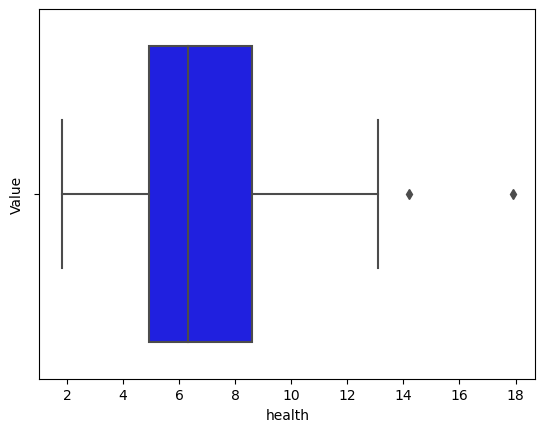

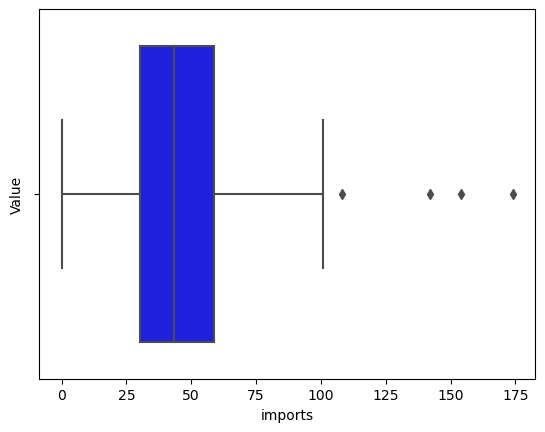

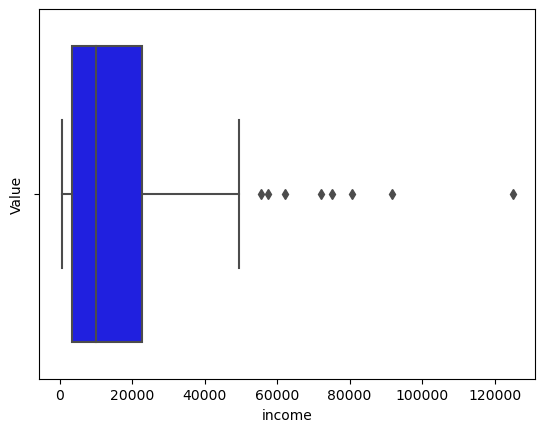

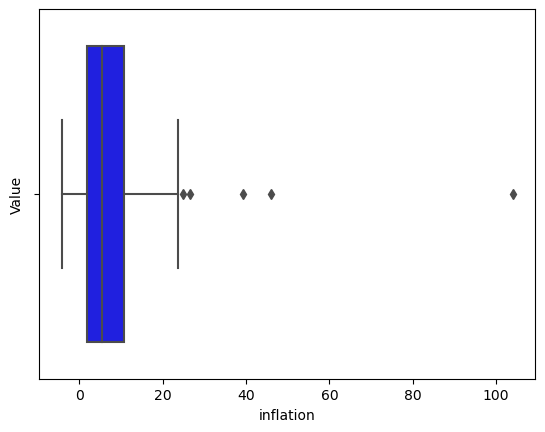

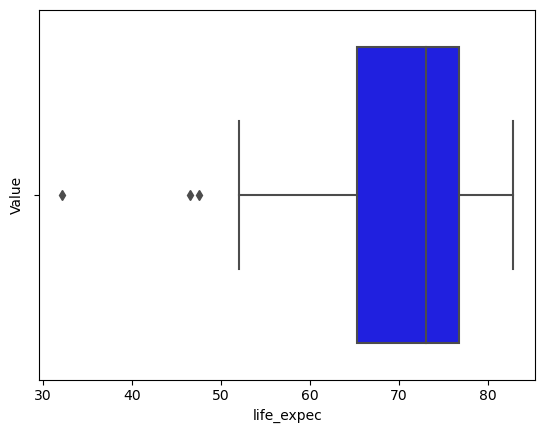

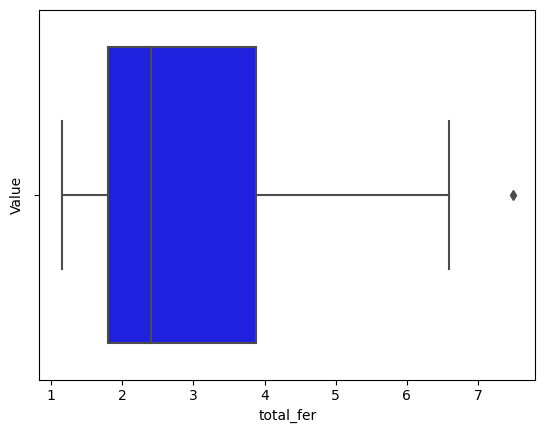

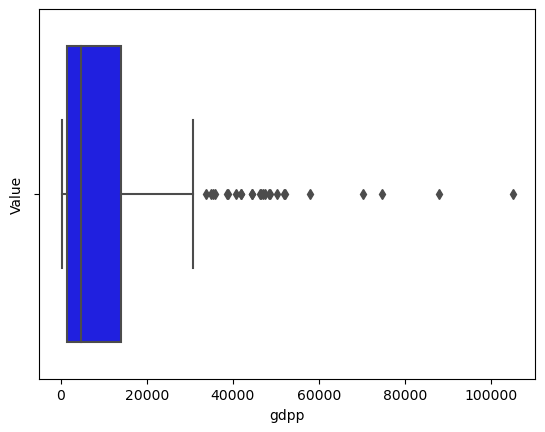

In [16]:
x = df1.drop(['country'],axis=1)
for o in x.columns:
    sns.boxplot(x[o],color='blue')
    plt.xlabel(o)
    plt.ylabel('Value')
    plt.show()

# Feature Scaling :

In [17]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
s_df = pd.DataFrame(std.fit_transform(df))

In [18]:
s_df

0         1         2         3         4         5         6  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245  0.157336 -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369 -0.312347  0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844  0.789274  0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043  1.387054 -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732 -0.601749  0.704258   
..        ...       ...       ...       ...       ...       ...       ...   
162 -0.225578  0.200917 -0.571711  0.240700 -0.738527 -0.489784 -0.852161   
163 -0.526514 -0.461363 -0.695862 -1.213499 -0.033542  3.616865  0.546361   
164 -0.372315  1.130305  0.008877  1.380030 -0.658404  0.409732  0.286958   
165  0.448417 -0.406478 -0.597272 -0.517472 -0.658924  1.500916 -0.344633   
166  1.114951 -0.150348 -0.338015 -0.662477 -0.721358  0.590015 -2.092785   

            7         8  
0    1.902882 -0.679180  
1   -0.859973 -0.485623  
2   -0.038404 -0.465376  
3    2.128151 -0.516268  
4   -0.541946 -0.041817  
..        ...       ...  
162  0.365754 -0.546913  
163 -0.316678  0.029323  
164 -0.661206 -0.637754  
165  1.140944 -0.637754  
166  1.624609 -0.629546  

[167 rows x 9 columns]

# PCA :

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pca.fit_transform(s_df)

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

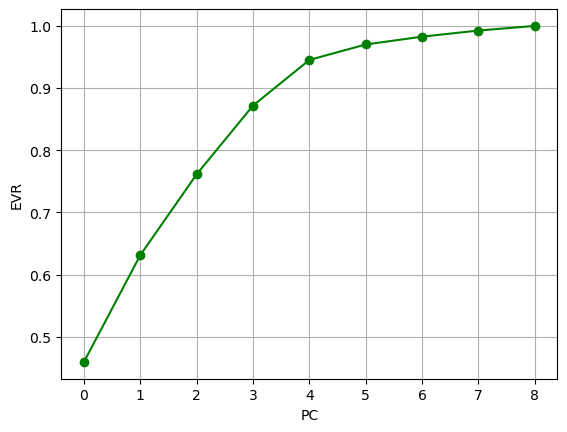

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='green',marker='o')
plt.xlabel('PC')
plt.ylabel('EVR')
plt.grid()
plt.show()

In [22]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [23]:
pcs = pd.DataFrame({'Explained_variance':list(pca.explained_variance_)})
pcs.insert(0,'pc_no',[p for p in range(1,10)])
pcs

pc_no  Explained_variance
0      1            4.160570
1      2            1.555662
2      3            1.177434
3      4            1.000777
4      5            0.664599
5      6            0.224928
6      7            0.114122
7      8            0.088847
8      9            0.067278

In [24]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [25]:
pca1 = PCA(n_components=5)
pc = pca1.fit_transform(s_df)

In [26]:
pc_df = pd.DataFrame(pc,columns=['pc1','pc2','pc3','pc4','pc5'])
pc_df

pc1       pc2       pc3       pc4       pc5
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]

In [27]:
egan_df = pd.DataFrame({'pc1':pca.components_[0],'pc2':pca.components_[1],'pc3':pca.components_[2],'pc4':pca.components_[3],'pc5':pca.components_[4]})
egan_df.insert(0,'columns',x1.columns)
egan_df

columns       pc1       pc2       pc3       pc4       pc5
0  child_mort -0.419519  0.192884 -0.029544  0.370653 -0.168970
1     exports  0.283897  0.613163  0.144761  0.003091  0.057616
2      health  0.150838 -0.243087 -0.596632  0.461897  0.518000
3     imports  0.161482  0.671821 -0.299927 -0.071907  0.255376
4      income  0.398441  0.022536  0.301548  0.392159 -0.247150
5   inflation -0.193173 -0.008404  0.642520  0.150442  0.714869
6  life_expec  0.425839 -0.222707  0.113919 -0.203797  0.108220
7   total_fer -0.403729  0.155233  0.019549  0.378304 -0.135262
8        gdpp  0.392645 -0.046022  0.122977  0.531995 -0.180167

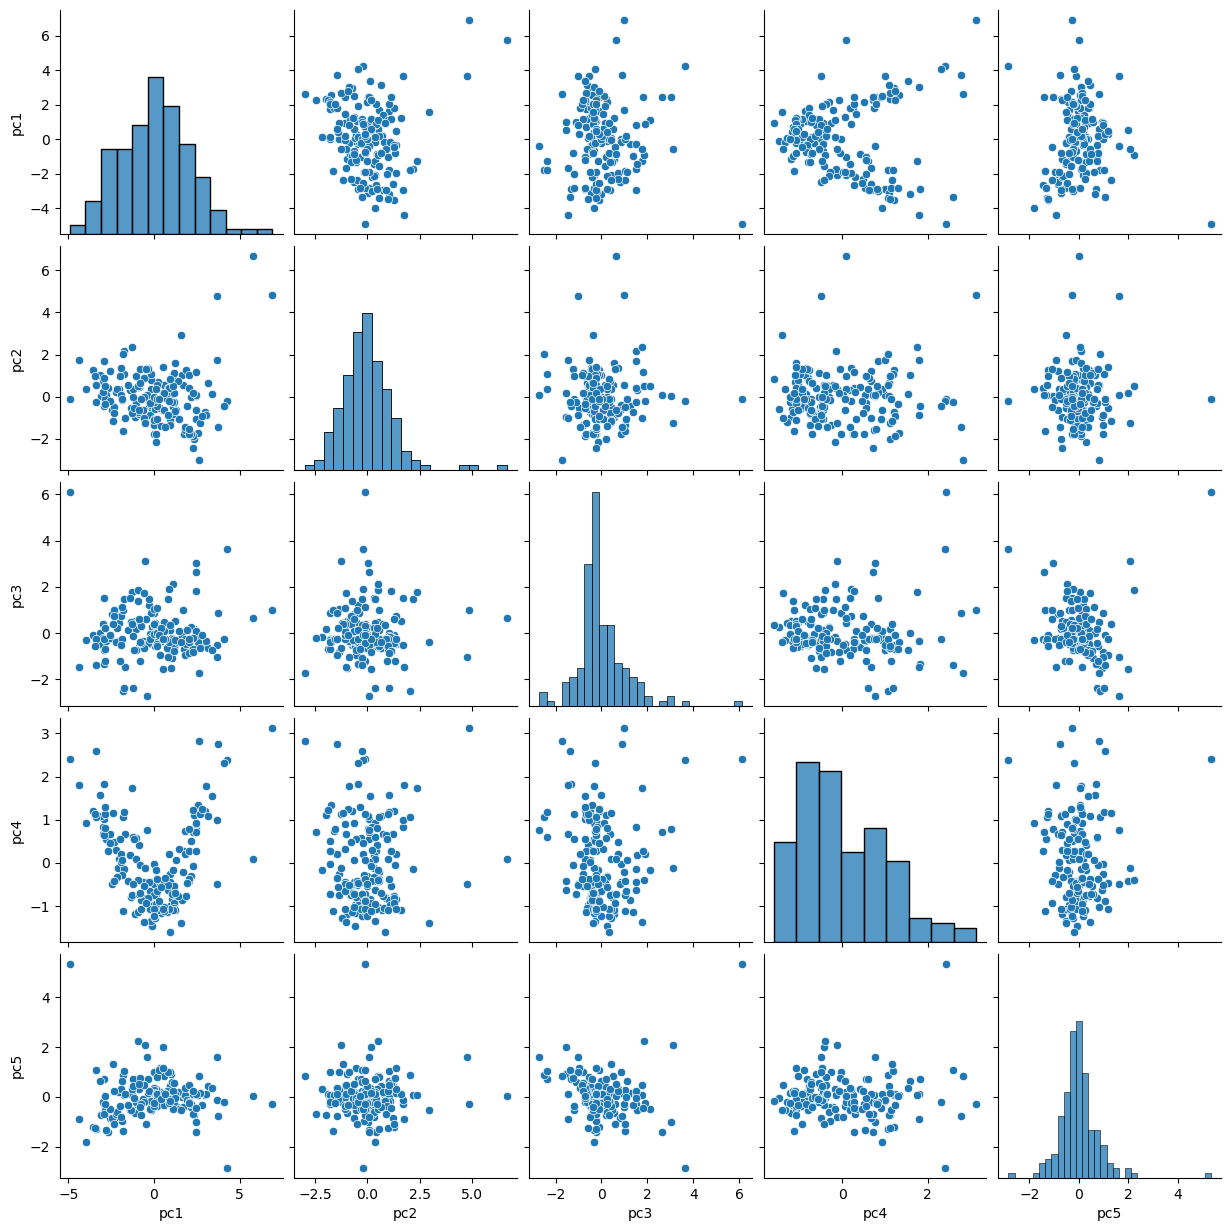

In [28]:
sns.pairplot(pc_df)

In [29]:
pc_df.shape

(167, 5)

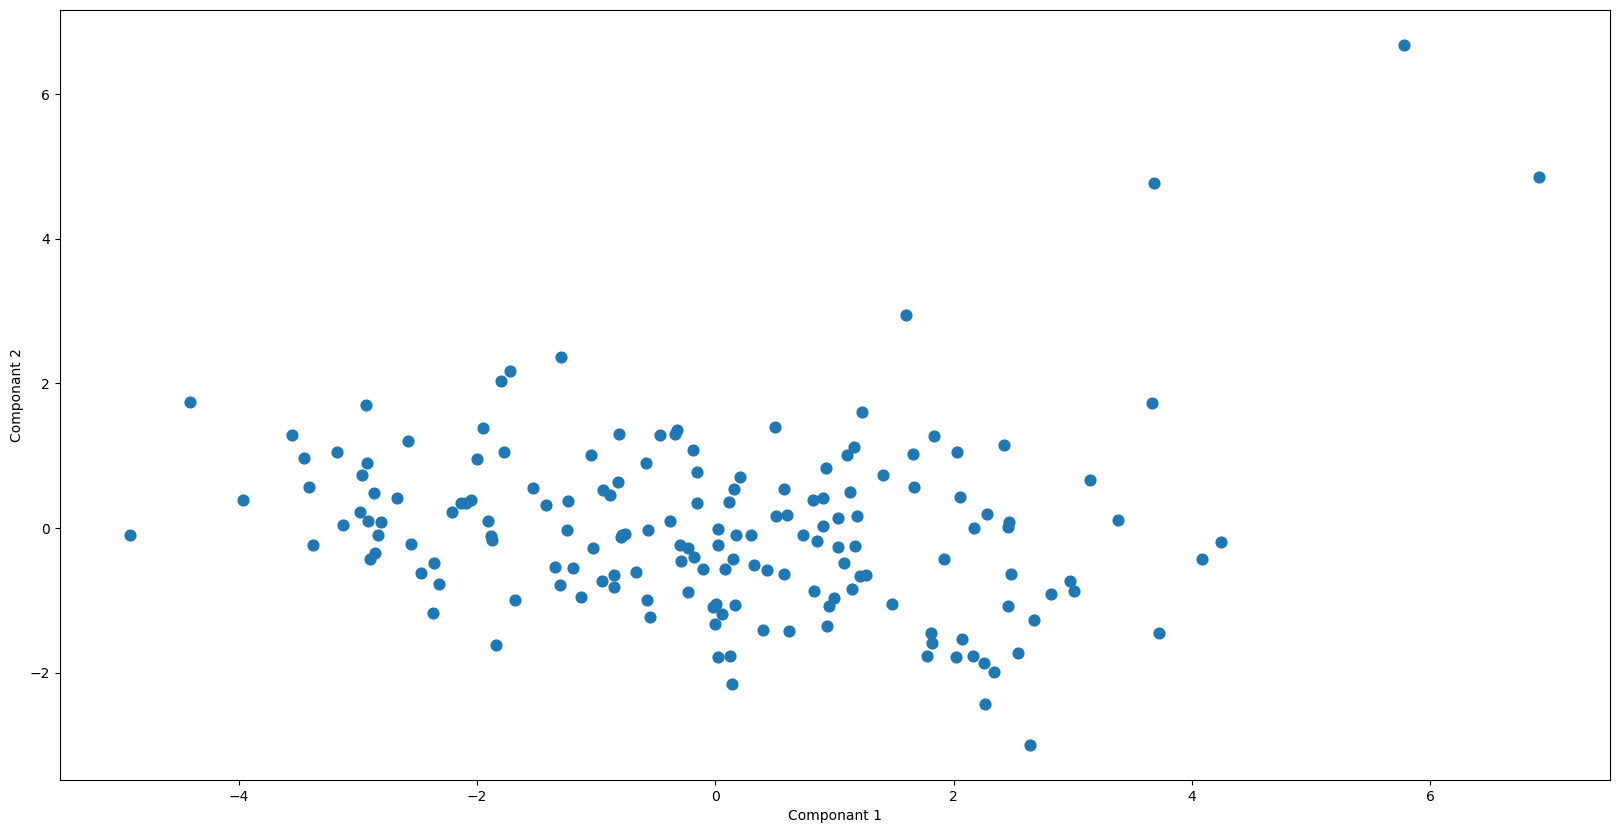

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(data=pc_df,x='pc1',y='pc2',s=60)
plt.xlabel('Componant 1')
plt.ylabel('Componant 2')
plt.show()

# KMeans :

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Elbow Plot :

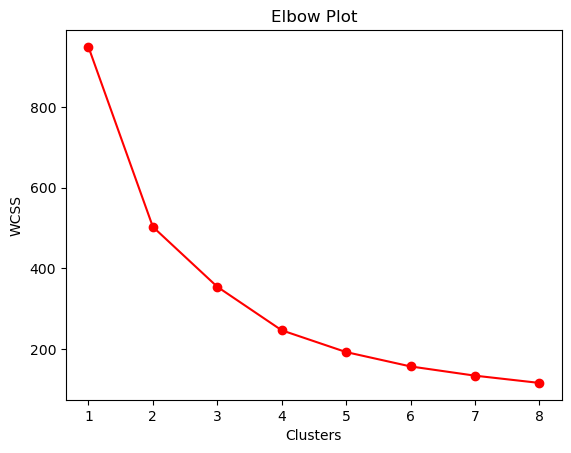

In [32]:
cluster = range(1,9)
err=[]
for c in cluster:
    km = KMeans(n_clusters=c)
    km.fit(pc_df[['pc1','pc2']])
    err.append(km.inertia_)
plt.plot(cluster,err,marker='o',color='red')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [33]:
sill=[]
for l1 in range(2,9):
    km1 = KMeans(n_clusters=l1,random_state=0)
    km1.fit(pc_df[['pc1','pc2']])
    sill.append(silhouette_score(pc_df[['pc1','pc2']],km1.labels_))
    print('With ',l1,' clusters the silhouette_score is = ',silhouette_score(pc_df[['pc1','pc2']],km1.labels_))
    print()

With  2  clusters the silhouette_score is =  0.41552290837872596

With  3  clusters the silhouette_score is =  0.4424972238276244

With  4  clusters the silhouette_score is =  0.39246821779860674

With  5  clusters the silhouette_score is =  0.3820636406980114

With  6  clusters the silhouette_score is =  0.3797438999299388

With  7  clusters the silhouette_score is =  0.36169119444617653

With  8  clusters the silhouette_score is =  0.35565511133791583



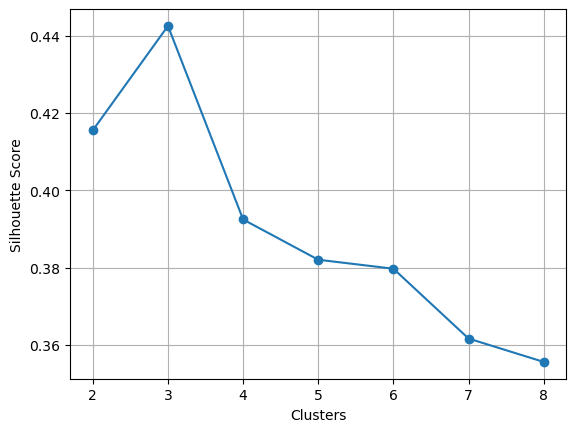

In [34]:
clu = range(2,9)
plt.plot(clu,sill,marker='o')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [35]:
KM = KMeans(n_clusters=3,random_state=111)
y_pre = KM.fit_predict(pc_df[['pc1','pc2']])
y_pre

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [36]:
pc_df['Cluster ID']=y_pre
f_df = pc_df[pc_df['Cluster ID']==0]
f_df1 = pc_df[pc_df['Cluster ID']==1]
f_df2 = pc_df[pc_df['Cluster ID']==2]
pc_df

pc1       pc2       pc3       pc4       pc5  Cluster ID
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310           0
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677           1
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475           1
3   -2.932423  1.695555  1.525044  0.839625 -0.273209           0
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007           1
..        ...       ...       ...       ...       ...         ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748           0
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581           0
164  0.498524  1.390744 -0.238526 -1.074098  1.176081           1
165 -1.887451 -0.109453  1.109752  0.056257  0.618365           0
166 -2.864064  0.485998  0.223167  0.816364 -0.274068           0

[167 rows x 6 columns]

In [37]:
Y = pc_df['Cluster ID']

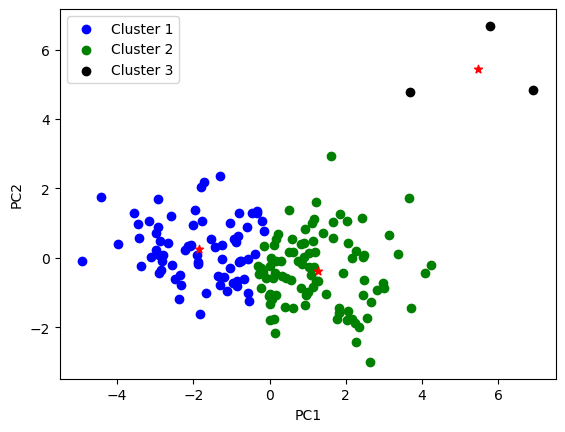

In [38]:
plt.scatter(f_df['pc1'],f_df['pc2'],color='blue',label='Cluster 1')
plt.scatter(f_df1['pc1'],f_df1['pc2'],color='green',label='Cluster 2')
plt.scatter(f_df2['pc1'],f_df2['pc2'],color='black',label='Cluster 3')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],marker='*',color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# KMeans (3D) :

In [39]:
sill1=[]
for l1 in range(2,9):
    km1 = KMeans(n_clusters=l1,random_state=10)
    km1.fit(pc_df[['pc1','pc2','pc3']])
    sill.append(silhouette_score(pc_df[['pc1','pc2','pc3']],km1.labels_))
    print('With ',l1,' clusters the silhouette_score is = ',silhouette_score(pc_df[['pc1','pc2','pc3']],km1.labels_))
    print()

With  2  clusters the silhouette_score is =  0.3486469452367986

With  3  clusters the silhouette_score is =  0.3721440572631934

With  4  clusters the silhouette_score is =  0.2958515074745073

With  5  clusters the silhouette_score is =  0.29444567689791157

With  6  clusters the silhouette_score is =  0.30649621030120766

With  7  clusters the silhouette_score is =  0.30836210517339363

With  8  clusters the silhouette_score is =  0.309255657879561



In [40]:
KM1 = KMeans(n_clusters=3)
y_pre1 = KM.fit_predict(pc_df[['pc1','pc2','pc3']])
y_pre1

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [41]:
pc_df1 = pc_df.copy()
pc_df1['Cluster id 3d']=y_pre1

px.scatter_3d(pc_df1,x='pc1',y='pc2',z='pc3',color=KM1.fit_predict(pc_df1[['pc1','pc2','pc3']]))

In [42]:
final_df = pd.concat([df,Y],axis=1)
final_df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  Cluster ID  
0         5.82    553           0  
1         1.65   4090           1  
2         2.89   4460           1  
3         6.16   3530           0  
4         2.13  12200           1  
..         ...    ...         ...  
162       3.50   2970           0  
163       2.47  13500           0  
164       1.95   1310           1  
165       4.67   1310           0  
166       5.40   1460           0  

[167 rows x 10 columns]

In [43]:
dff = final_df.groupby('Cluster ID').mean()
dff

child_mort     exports    health     imports        income  \
Cluster ID                                                               
0            73.363889   30.581931  6.000556   43.703693   4531.847222   
1            11.918478   44.948913  7.454348   45.804348  25486.630435   
2             4.133333  176.000000  6.793333  156.666667  64033.333333   

            inflation  life_expec  total_fer          gdpp  
Cluster ID                                                  
0           11.578264   62.459722   4.303611   2178.666667  
1            4.983989   76.536957   1.938152  19950.543478  
2            2.468000   81.433333   1.380000  57566.666667

In [44]:
n_df = dff.sort_values('gdpp',ascending=False)
n_df

child_mort     exports    health     imports        income  \
Cluster ID                                                               
2             4.133333  176.000000  6.793333  156.666667  64033.333333   
1            11.918478   44.948913  7.454348   45.804348  25486.630435   
0            73.363889   30.581931  6.000556   43.703693   4531.847222   

            inflation  life_expec  total_fer          gdpp  
Cluster ID                                                  
2            2.468000   81.433333   1.380000  57566.666667  
1            4.983989   76.536957   1.938152  19950.543478  
0           11.578264   62.459722   4.303611   2178.666667

In [45]:
XX = final_df['Cluster ID']
XX[XX==2]='Developed'
XX[XX==0]='Developing'
XX[XX==1]='Under Developed'
df4 = pd.concat([df1,Y],axis=1)
df4['Condition']=XX.values
df4

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Cluster ID        Condition  
0         9.44        56.2       5.82    553           0       Developing  
1         4.49        76.3       1.65   4090           1  Under Developed  
2        16.10        76.5       2.89   4460           1  Under Developed  
3        22.40        60.1       6.16   3530           0       Developing  
4         1.44        76.8       2.13  12200           1  Under Developed  
..         ...         ...        ...    ...         ...              ...  
162       2.62        63.0       3.50   2970           0       Developing  
163      45.90        75.4       2.47  13500           0       Developing  
164      12.10        73.1       1.95   1310           1  Under Developed  
165      23.60        67.5       4.67   1310           0       Developing  
166      14.00        52.0       5.40   1460           0       Developing  

[167 rows x 12 columns]

<AxesSubplot:xlabel='Condition', ylabel='count'>

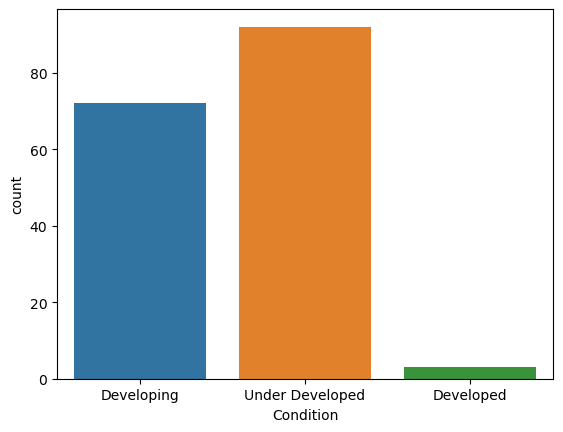

In [46]:
sns.countplot(df4['Condition'])

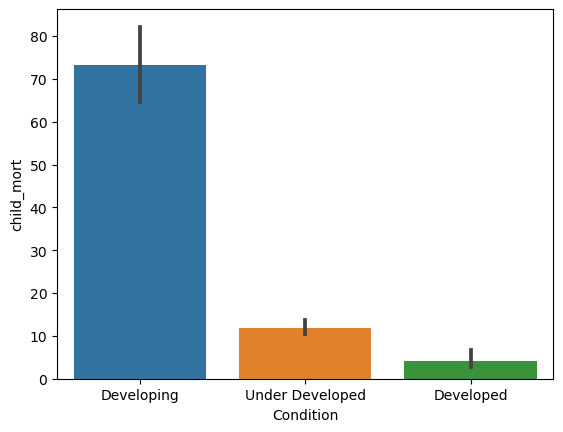

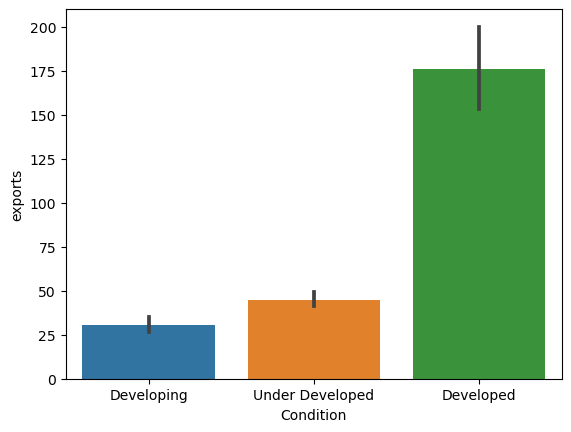

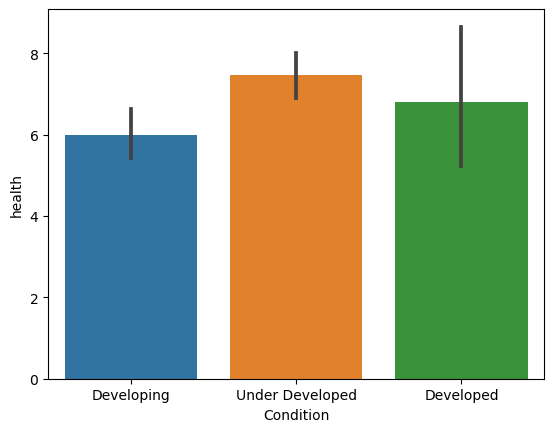

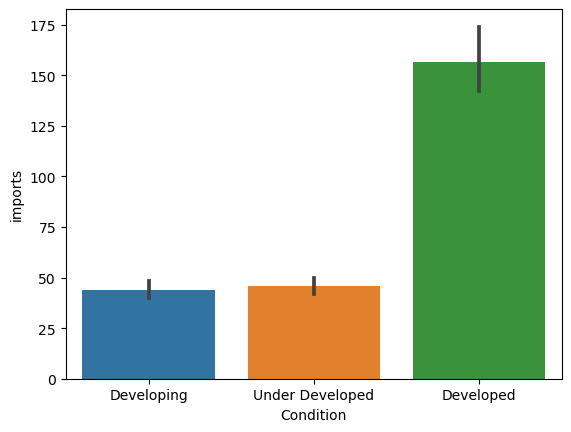

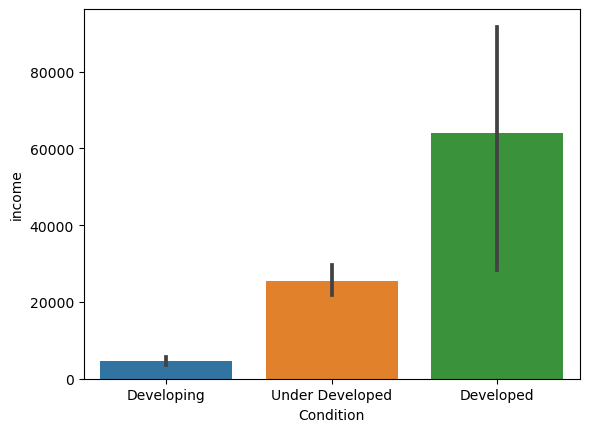

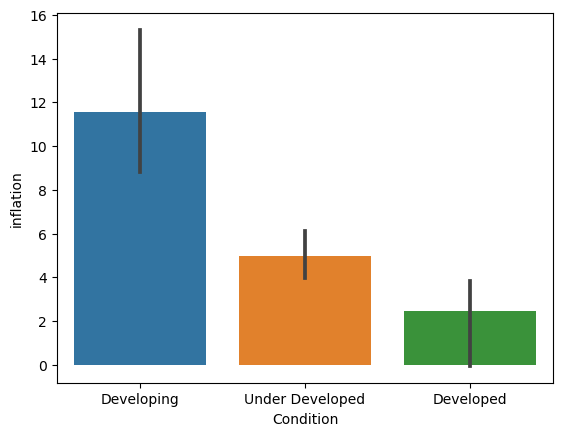

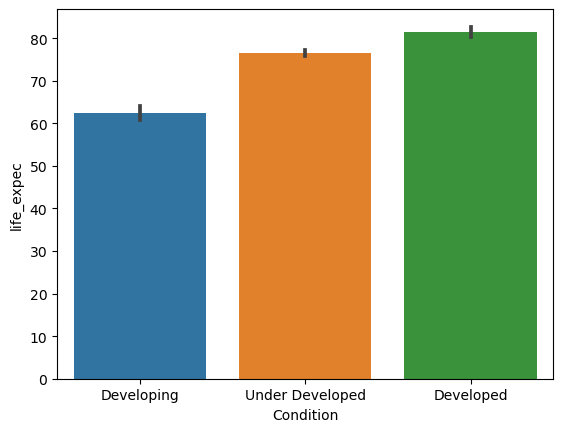

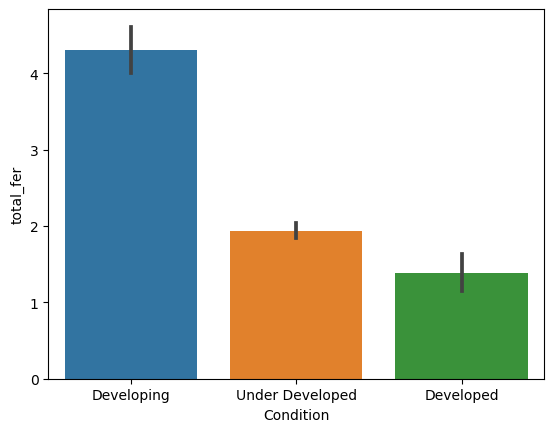

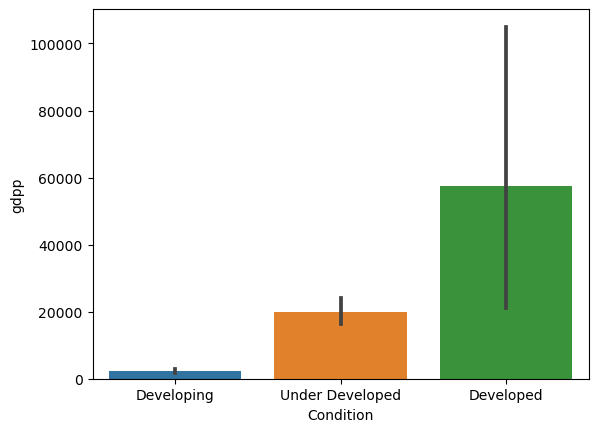

In [47]:
a1 = df4.drop(['Cluster ID'],axis=1)
for x in a1.iloc[:,1:-1]:
    sns.barplot(a1['Condition'],a1[x])
    plt.show()

# Agglomerative Clustering :

In [48]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [49]:
pc_df_2 = pc_df.copy()
pc_df_2.drop(['Cluster ID'],axis=1,inplace=True)
pc_df_2

pc1       pc2       pc3       pc4       pc5
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]

In [50]:
ag1 = AgglomerativeClustering(n_clusters=None,distance_threshold=0)
y_2 = ag1.fit_predict(pc_df_2[['pc1','pc2']])
y_2

array([151, 146, 149, 127, 136, 152, 121,  91, 142,  88, 163,  94, 110,
       109, 165, 131, 132, 126,  99, 166, 150, 153, 161, 159, 117,  98,
       156, 147,  89, 155, 107, 133, 164, 160, 137, 138,  82, 103, 135,
       157, 108, 114, 118,  67,  96, 154, 162, 134, 140, 125, 130,  86,
       123, 101, 145, 129, 124, 100, 102, 158,  50, 143,  95,  65, 104,
        79, 111,  49,  64,  68, 148,  66,  90, 119, 139,  85, 120, 122,
        74,  78,  80,  72, 113,  75,  93,  47, 141,  70, 112,  77,  54,
        87,  69,  81,  62,  53,  73, 144,  61,  39,  71,  60,  76,  97,
        42, 128,  37,  59,  84,  40,  38,  35,  48,  19,  34,  92,  63,
        23,  44, 116,  33,  43,  51, 105,  55,  31,  16,  56,  21,  26,
        27,  83, 115,  58,  24, 106,  29,  18,  36,  30,  57,  45,  52,
        17,  28,  25,  46,  41,  20,  13,  12,   9,  11,  14,  32,  22,
        15,   6,  10,   8,   7,   4,   3,   5,   2,   1,   0], dtype=int64)

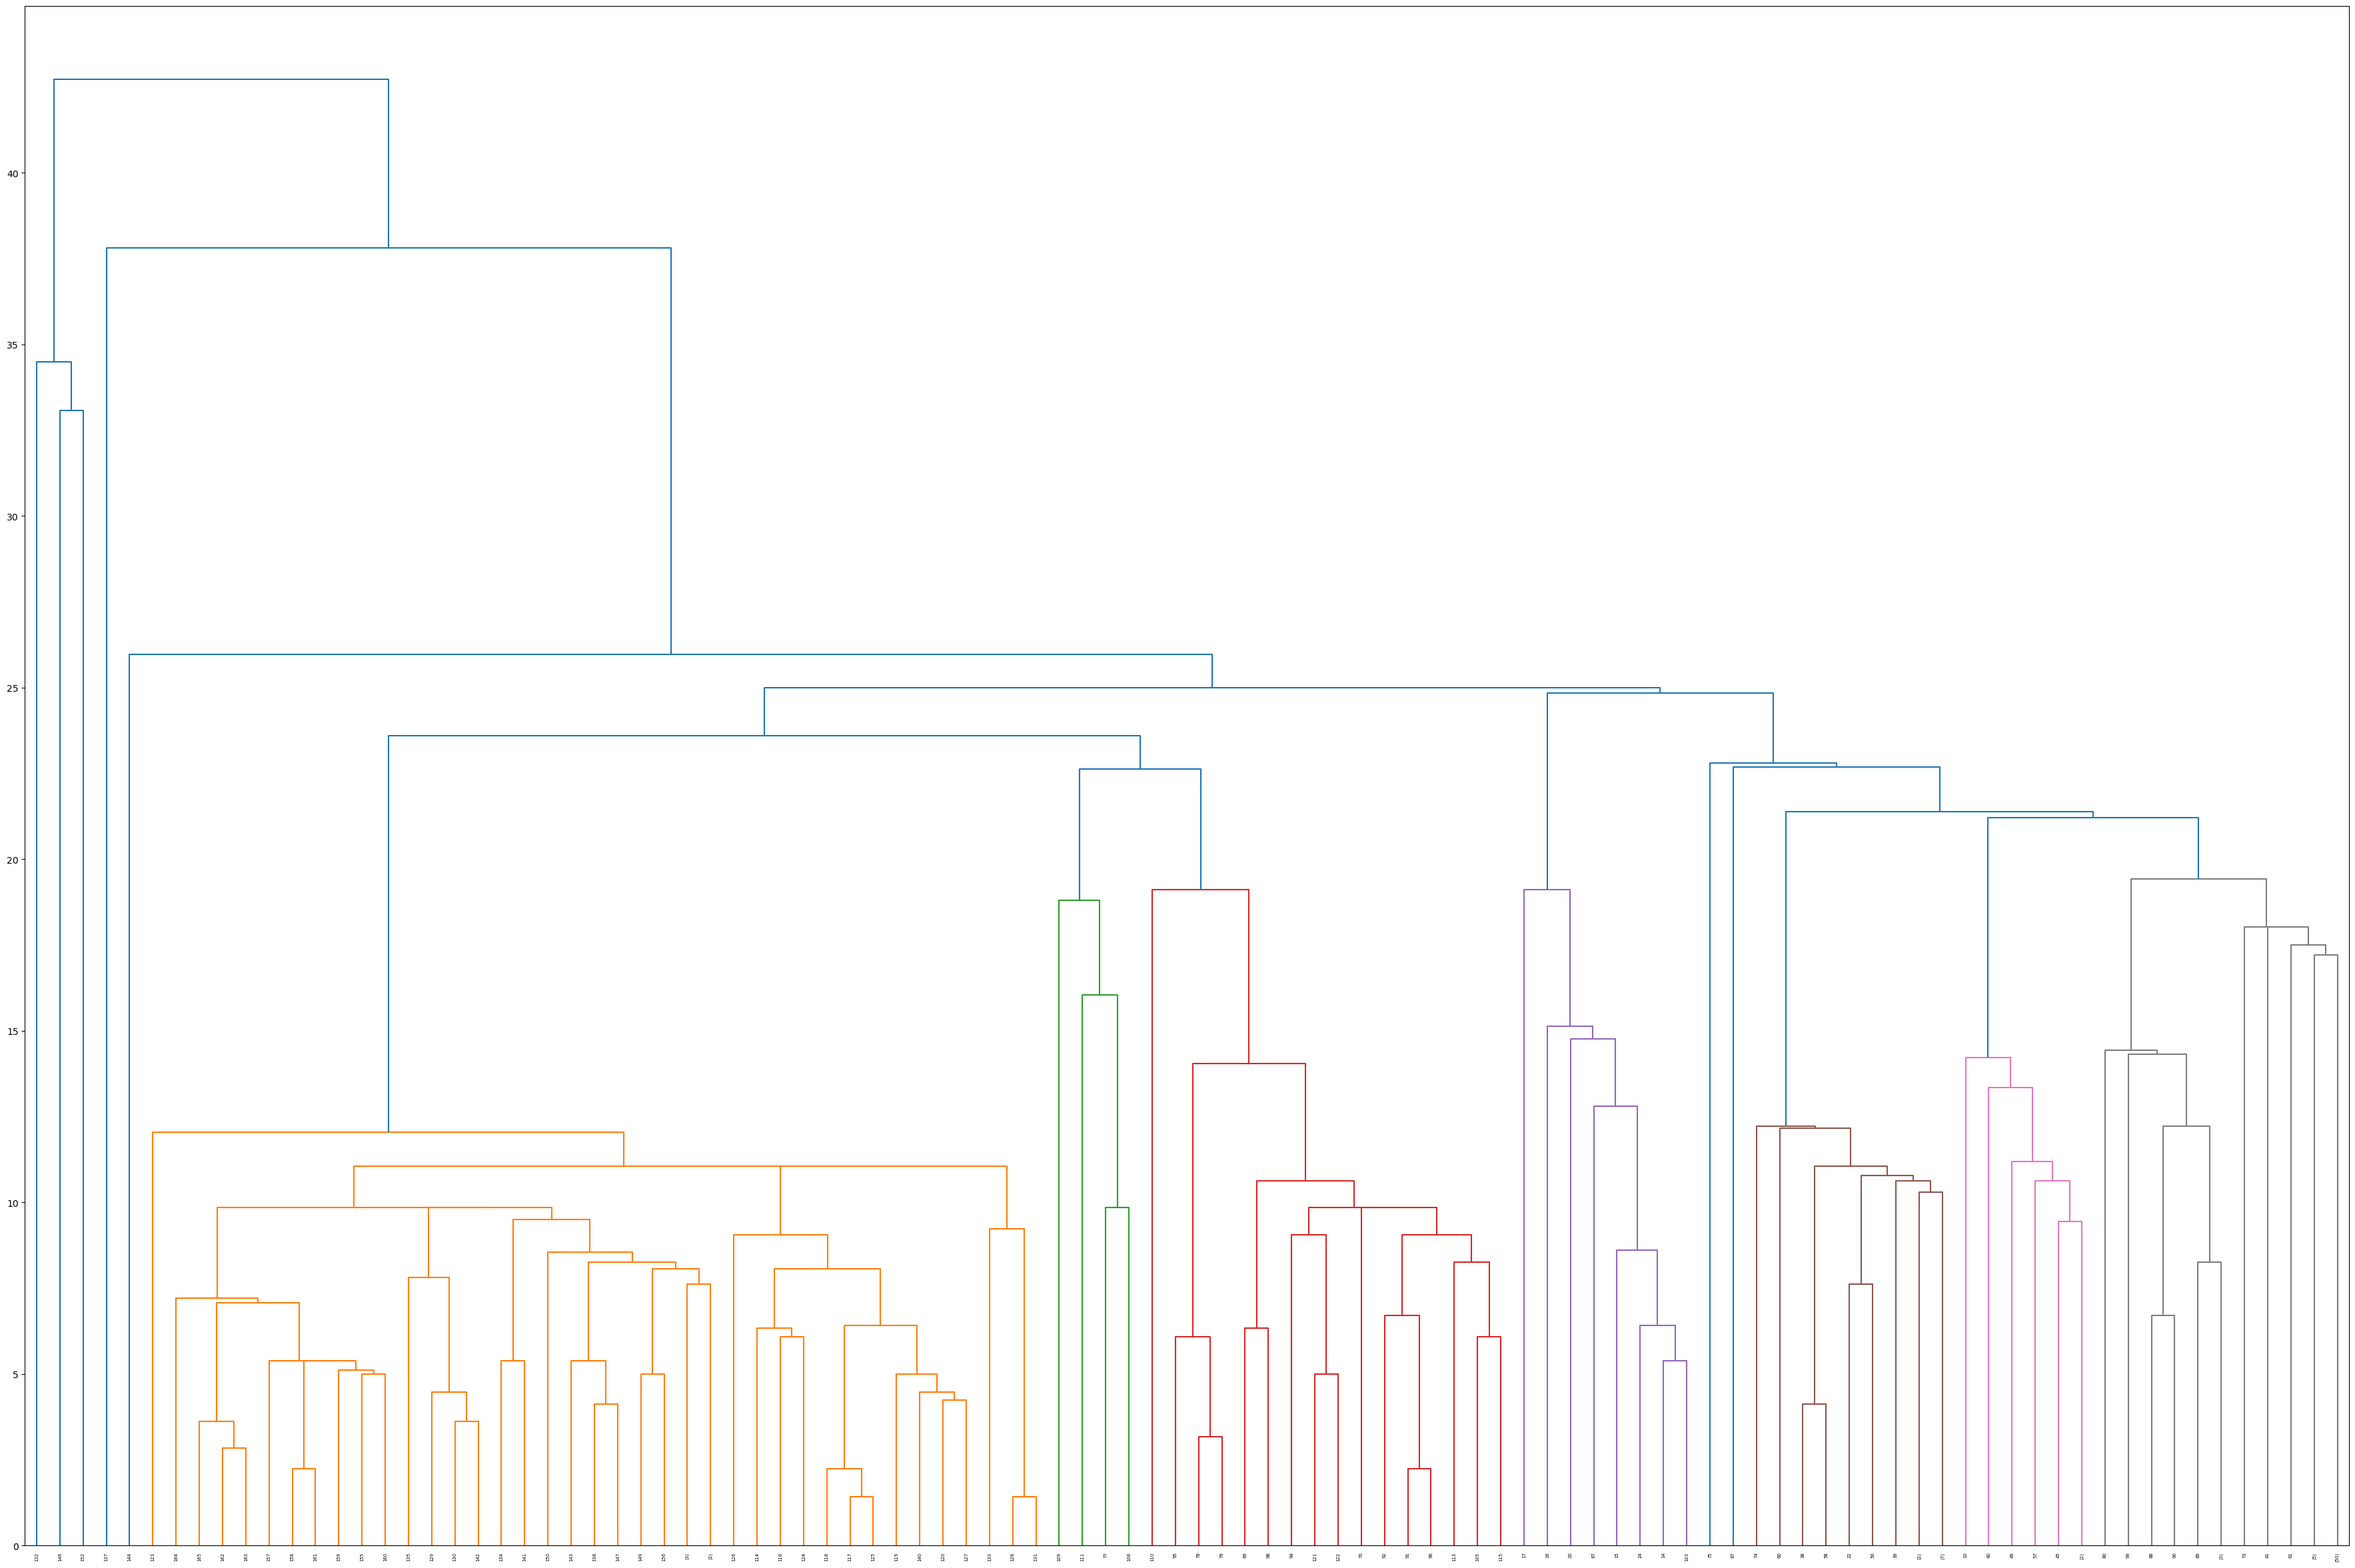

In [51]:
plt.figure(figsize=(45,30))
L = hierarchy.linkage(ag1.children_)
dm = dendrogram(L,p=13,truncate_mode='level',color_threshold=20)

In [52]:
sc=[]
for d in range(2,6):
    ag2 = AgglomerativeClustering(n_clusters=d)
    ag2.fit(pc_df_2[['pc1','pc2']])
    sc.append(silhouette_score(pc_df_2[['pc1','pc2']],ag2.labels_))
    print('for ',d,' Clusters the score is = '+str(silhouette_score(pc_df_2[['pc1','pc2']],ag2.labels_)))

for  2  Clusters the score is = 0.40724547556154894
for  3  Clusters the score is = 0.4308434627918911
for  4  Clusters the score is = 0.35211684157986967
for  5  Clusters the score is = 0.32314920412003006


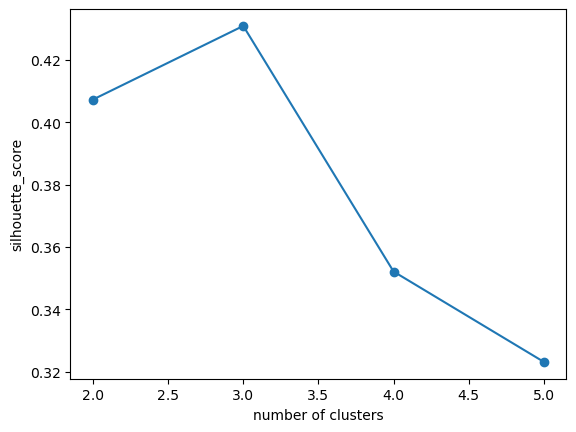

In [53]:
plt.plot([y for y in range(2,6)],sc,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [54]:
Ag = AgglomerativeClustering(n_clusters=3)
y_pre_ag = Ag.fit_predict(pc_df_2[['pc1','pc2']])
y_pre_ag

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

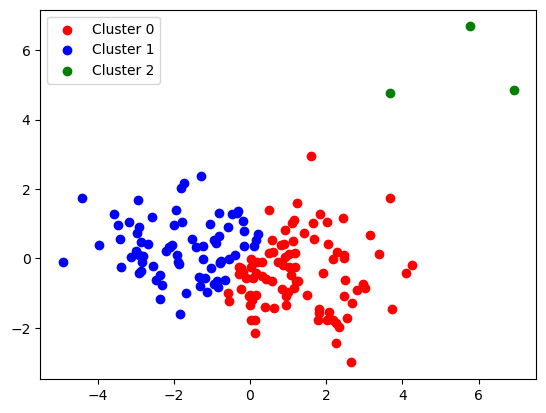

In [55]:
pc_df_2['Cluster ID']=y_pre_ag
df_x = pc_df_2[pc_df_2['Cluster ID']==0]
df_y = pc_df_2[pc_df_2['Cluster ID']==1]
df_z = pc_df_2[pc_df_2['Cluster ID']==2]

plt.scatter(df_x['pc1'],df_x['pc2'],color='red',label='Cluster 0')
plt.scatter(df_y['pc1'],df_y['pc2'],color='blue',label='Cluster 1')
plt.scatter(df_z['pc1'],df_z['pc2'],color='green',label='Cluster 2')
plt.legend()
plt.show()

In [56]:
pc_df_2

pc1       pc2       pc3       pc4       pc5  Cluster ID
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310           1
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677           0
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475           0
3   -2.932423  1.695555  1.525044  0.839625 -0.273209           1
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007           0
..        ...       ...       ...       ...       ...         ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748           1
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581           0
164  0.498524  1.390744 -0.238526 -1.074098  1.176081           0
165 -1.887451 -0.109453  1.109752  0.056257  0.618365           1
166 -2.864064  0.485998  0.223167  0.816364 -0.274068           1

[167 rows x 6 columns]

In [57]:
con = pc_df_2['Cluster ID']

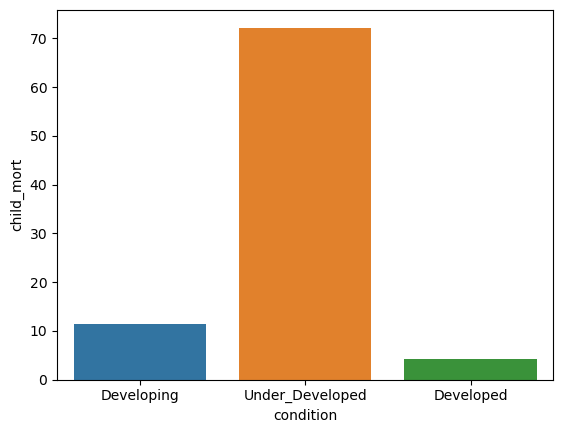

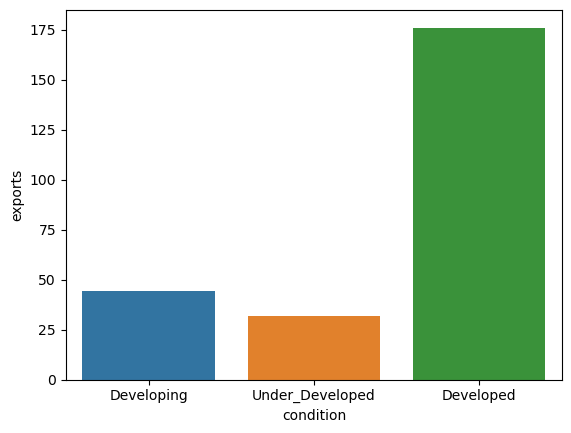

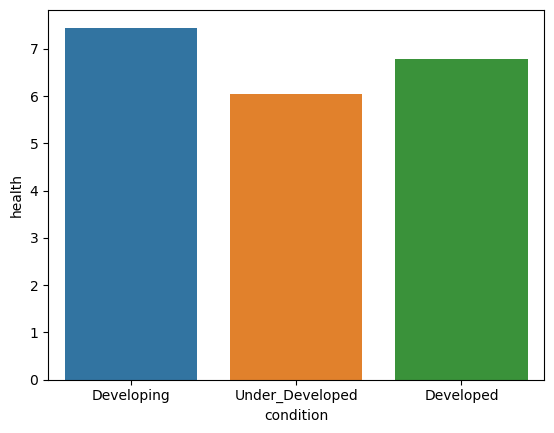

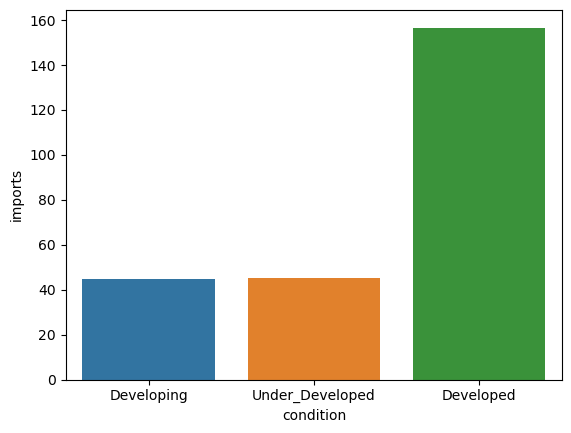

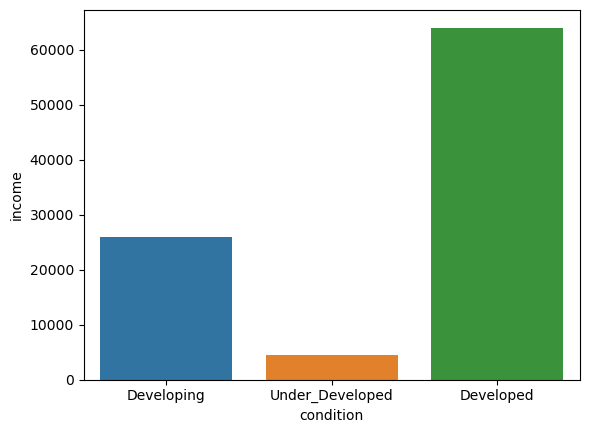

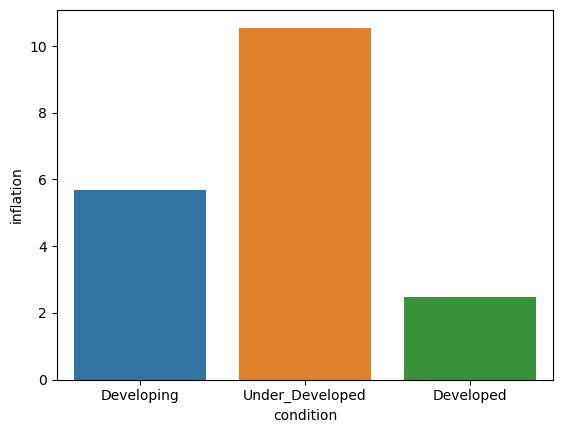

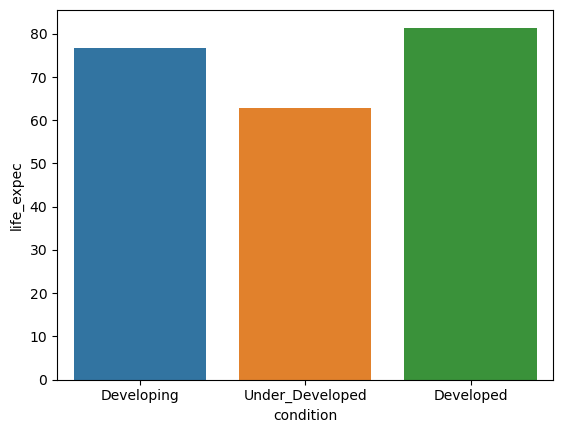

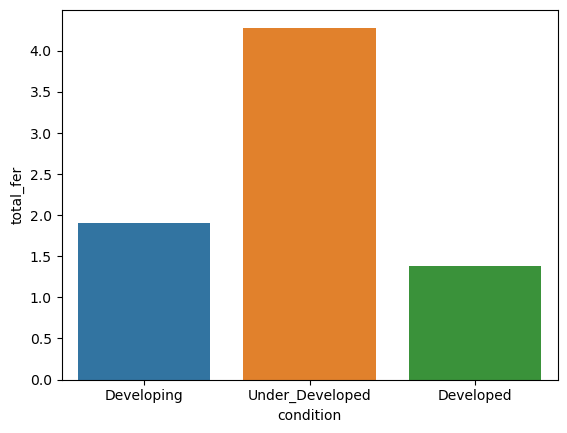

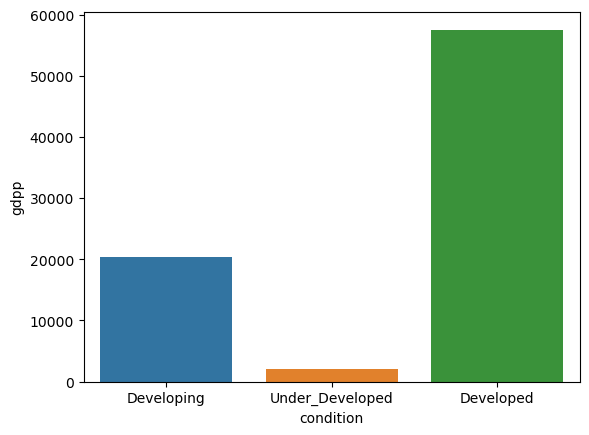

In [58]:
ag_data = pd.concat([df1,con],axis=1)
ab = ag_data.groupby('Cluster ID').mean()
ab.insert(0,'condition',['Developing','Under_Developed','Developed'])
for c in ab.iloc[:,1::]:
    sns.barplot(ab['condition'],ab[c])
    plt.show()

In [59]:
con[con==2]='Developed'
con[con==1]='Under Developed'
con[con==0]='Developing'

In [60]:
ag_data['Condition']=con.values
ag_data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Cluster ID        Condition  
0         9.44        56.2       5.82    553           1  Under Developed  
1         4.49        76.3       1.65   4090           0       Developing  
2        16.10        76.5       2.89   4460           0       Developing  
3        22.40        60.1       6.16   3530           1  Under Developed  
4         1.44        76.8       2.13  12200           0       Developing  
..         ...         ...        ...    ...         ...              ...  
162       2.62        63.0       3.50   2970           1  Under Developed  
163      45.90        75.4       2.47  13500           0       Developing  
164      12.10        73.1       1.95   1310           0       Developing  
165      23.60        67.5       4.67   1310           1  Under Developed  
166      14.00        52.0       5.40   1460           1  Under Developed  

[167 rows x 12 columns]

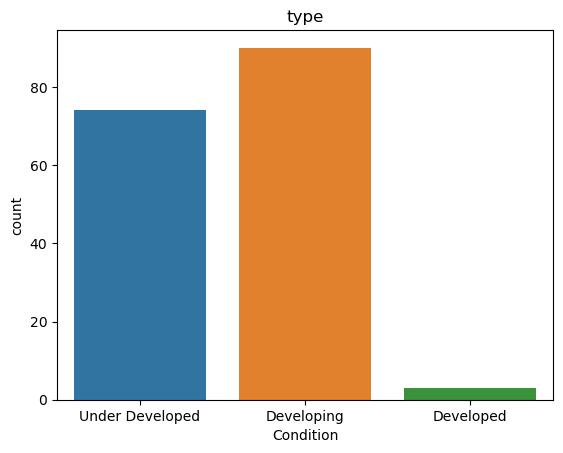

In [61]:
sns.countplot(ag_data['Condition'])
plt.title('type')
plt.show()

# DBSCAN :

In [62]:
from sklearn.cluster import DBSCAN
pc_df3 = pc_df_2.drop(['Cluster ID'],axis=1)

In [63]:
eps = np.linspace(0.6,1.5,10)
sil1=[]
for e in eps:
    db = DBSCAN(eps=e)
    db.fit(pc_df3[['pc1','pc2']])
    sil1.append(silhouette_score(pc_df3[['pc1','pc2']],db.labels_))
    print('for eps = ',e,' silhouette score is = '+str(silhouette_score(pc_df3[['pc1','pc2']],db.labels_)))
    print()
          

for eps =  0.6  silhouette score is = 0.3772295388004358

for eps =  0.7  silhouette score is = 0.43399972541577037

for eps =  0.8  silhouette score is = 0.4537794831793003

for eps =  0.9  silhouette score is = 0.4774235035435934

for eps =  1.0  silhouette score is = 0.5640649347251716

for eps =  1.1  silhouette score is = 0.5814304679476238

for eps =  1.2000000000000002  silhouette score is = 0.6106645374986899

for eps =  1.3  silhouette score is = 0.6106645374986899

for eps =  1.4  silhouette score is = 0.6608599939594201

for eps =  1.5  silhouette score is = 0.6608599939594201



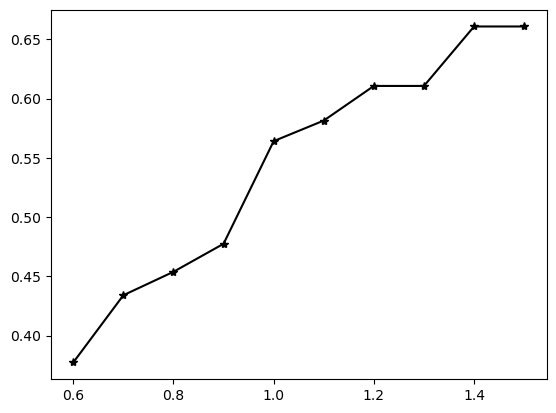

In [64]:
plt.plot(eps,sil1,marker='*',color='black')

In [65]:
DB = DBSCAN(eps=1.4,min_samples=10)
y_pre_db = DB.fit_predict(pc_df3[['pc1','pc2']])
y_pre_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [66]:
pc_df3['Cluster_ID']=y_pre_db
pc_df3['Cluster_ID'].nunique()

2

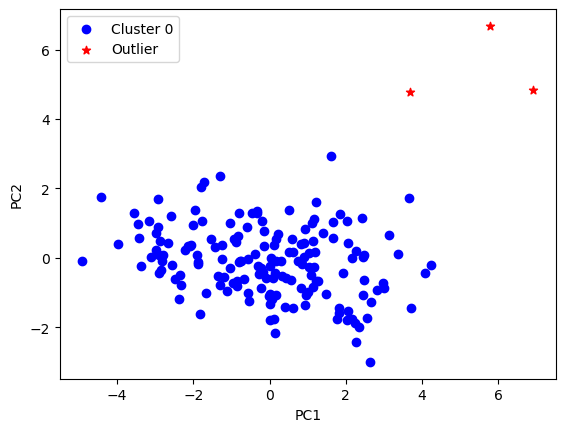

In [67]:
df_db = pc_df3[pc_df3['Cluster_ID']==0]
df_db1 = pc_df3[pc_df3['Cluster_ID']==-1]

plt.scatter(df_db['pc1'],df_db['pc2'],color='blue',label='Cluster 0')
plt.scatter(df_db1['pc1'],df_db1['pc2'],color='red',marker='*',label='Outlier')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [68]:
cl = pc_df3['Cluster_ID']
cl[cl==0]='Not_developed'
cl[cl==-1]='developed'
pc_df3['condition']=cl.values
pc_df3.drop(['Cluster_ID'],axis=1,inplace=True)
pc_df3

pc1       pc2       pc3       pc4       pc5      condition
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310  Not_developed
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677  Not_developed
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475  Not_developed
3   -2.932423  1.695555  1.525044  0.839625 -0.273209  Not_developed
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007  Not_developed
..        ...       ...       ...       ...       ...            ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748  Not_developed
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581  Not_developed
164  0.498524  1.390744 -0.238526 -1.074098  1.176081  Not_developed
165 -1.887451 -0.109453  1.109752  0.056257  0.618365  Not_developed
166 -2.864064  0.485998  0.223167  0.816364 -0.274068  Not_developed

[167 rows x 6 columns]

In [69]:
pc_df3['condition'].value_counts()

Not_developed    164
developed          3
Name: condition, dtype: int64

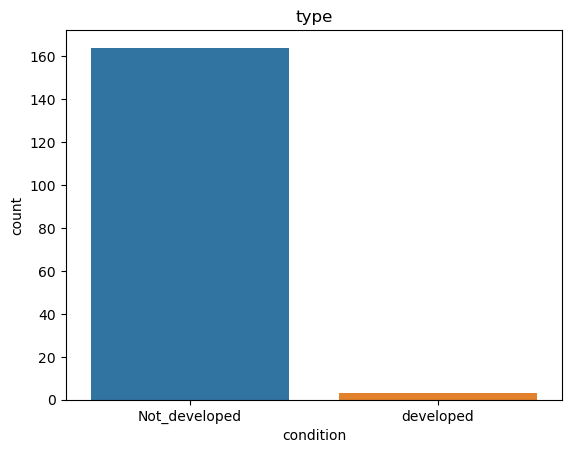

In [70]:
sns.countplot(pc_df3['condition'])
plt.title('type')
plt.show()

In [71]:
DB_df = pd.concat([df1,pc_df3['condition']],axis=1)
DB_df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp      condition  
0         9.44        56.2       5.82    553  Not_developed  
1         4.49        76.3       1.65   4090  Not_developed  
2        16.10        76.5       2.89   4460  Not_developed  
3        22.40        60.1       6.16   3530  Not_developed  
4         1.44        76.8       2.13  12200  Not_developed  
..         ...         ...        ...    ...            ...  
162       2.62        63.0       3.50   2970  Not_developed  
163      45.90        75.4       2.47  13500  Not_developed  
164      12.10        73.1       1.95   1310  Not_developed  
165      23.60        67.5       4.67   1310  Not_developed  
166      14.00        52.0       5.40   1460  Not_developed  

[167 rows x 11 columns]

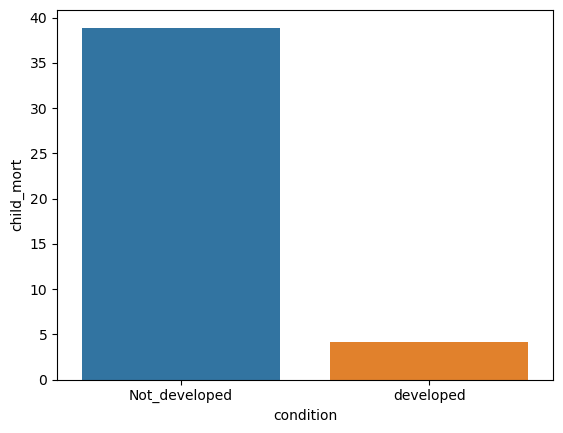

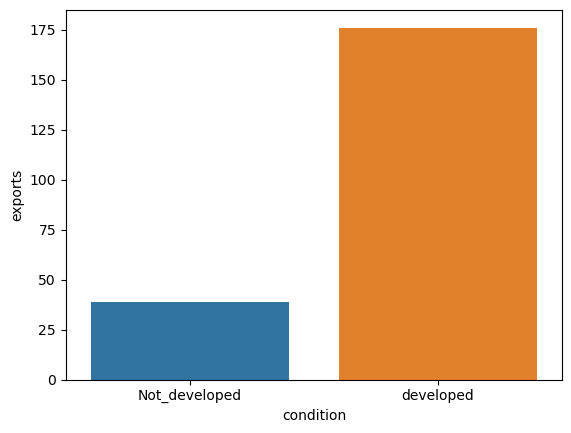

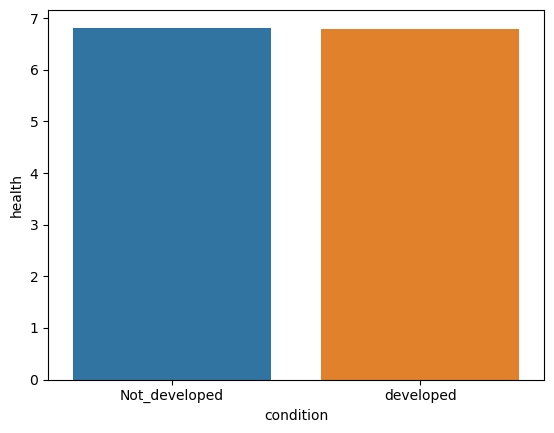

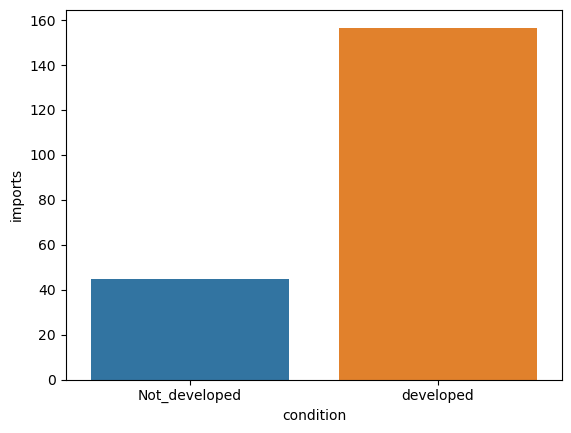

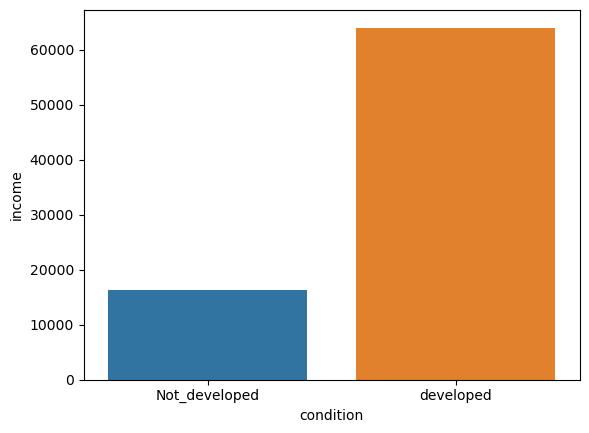

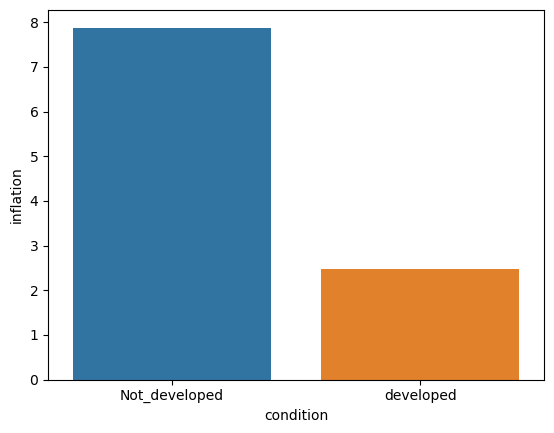

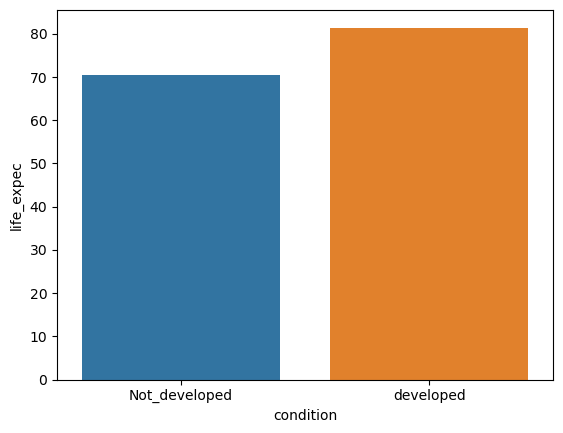

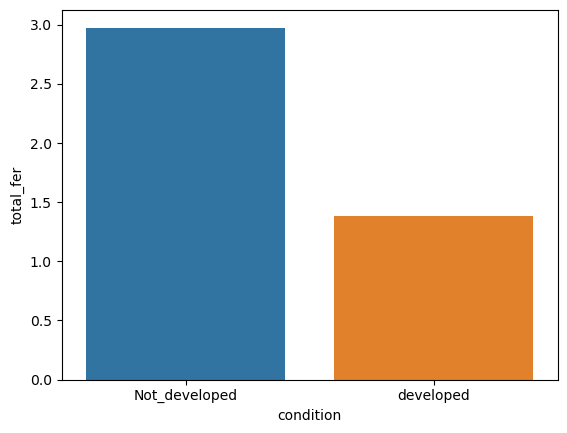

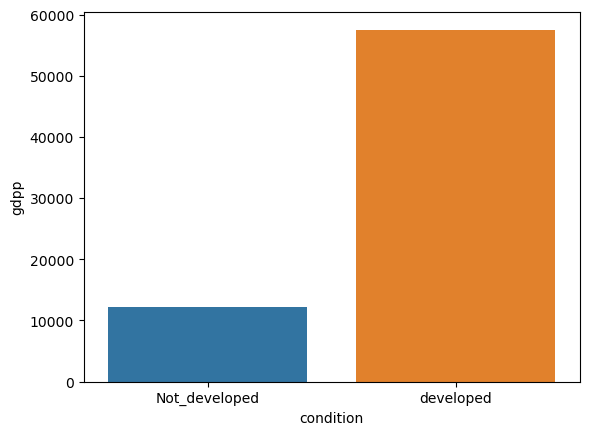

In [72]:
ac = DB_df.groupby('condition').mean()
ac.insert(0,'condition',['Not_developed','developed'])
for db in ac.iloc[:,1::]:
    sns.barplot(ac['condition'],ac[db])
    plt.show()